<a href="https://colab.research.google.com/github/sufairahmed/ML_IBM_COURSERA/blob/main/non_linera_regression_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [56]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

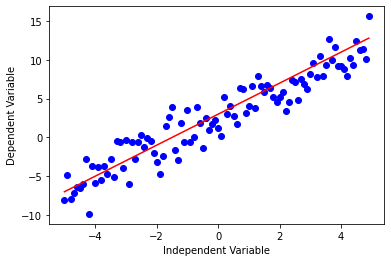

In [57]:
x = np.arange(-5.0, 5.0, 0.1)

#you can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x,ydata, 'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Non-linear Regression

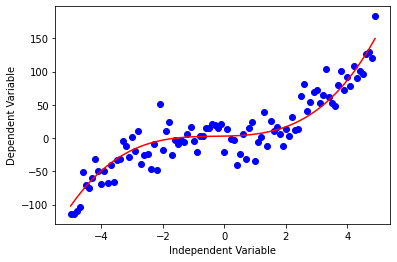

In [58]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Quadratic

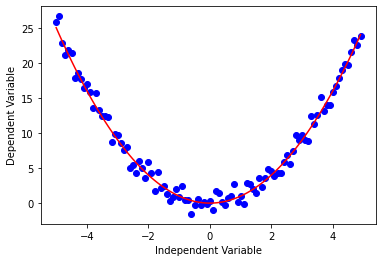

In [59]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Exponential

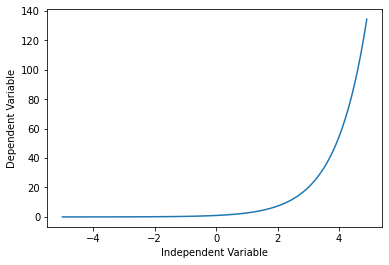

In [60]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)

plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Logarithmic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


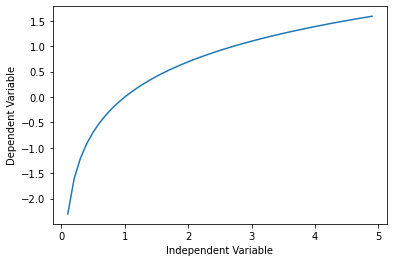

In [61]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

#Sigmoidal/Logistic

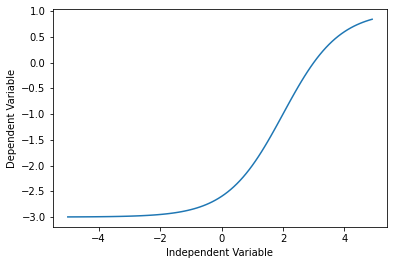

In [62]:
X = np.arange(-5.0, 5.0,0.1)
 
Y = 1-4/(1+np.power(3,X-2))

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Non Linear Regression Example

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('china_gdp.csv')
dataset.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


##Ploting the Dataset

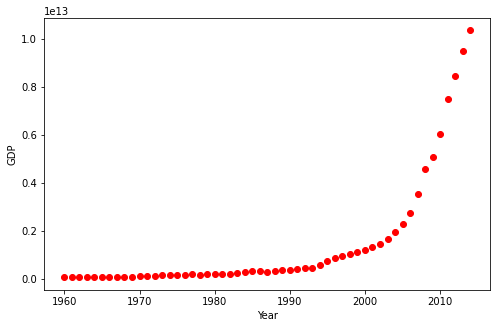

In [64]:
plt.figure(figsize=(8,5))
x_data, y_data = (dataset['Year'].values, dataset['Value'].values)

plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## Choosing a Model

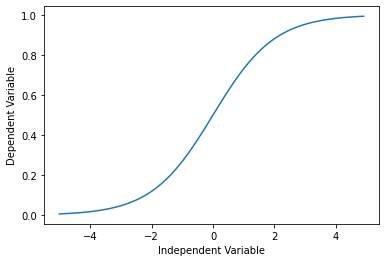

In [65]:
X = np.arange(-5.0,5.0, 0.1)
Y = 1.0 /(1.0 + np.exp(-X))

plt.plot(X,Y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

##Building The Model

In [66]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

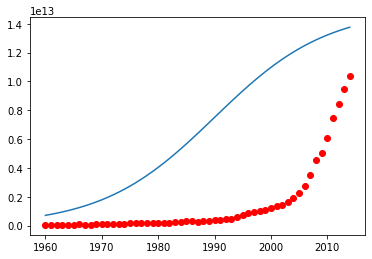

In [67]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

#Our tast here is to find out the best parameters for our model.

In [68]:
#Lest  normalized our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

###We can use curve_fit which use non_linear least squares to fit our sigmoid function

In [69]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid,xdata,ydata)
#print the final parameters
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))


beta_1 = 690.453017, beta_2 = 0.997207


##Now we plot our resulting regression model

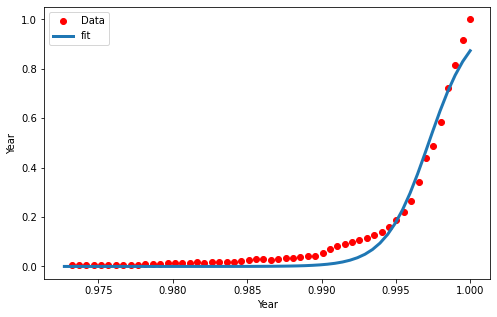

In [70]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata,'ro', label='Data')
plt.plot(x,y, linewidth= 3.0, label='fit')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Year')
plt.show()

#Now calculte  the acuracy of the model.

In [75]:
#First we need to split the data into train/test
msk = np.random.rand(len(dataset)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

#Build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

#predict using test set
y_pred =  sigmoid(test_x, *popt)

#Evaluation
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , test_y) )


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Mean absolute error: 0.25
Residual sum of squares (MSE): 0.16
R2-score: -92152307098966083144348743311032320.00
